In [15]:
# Necessary imports
import torch
from src.models import ActTime, ACTLitModule
import numpy as np
from src.utils import get_domains, plot_signals
from configs.option import parse_args
from os import path

In [17]:
ckpt_path = "./experiments/train/2024-12-30T19-53-05/checkpoint/last.ckpt"
assert path.exists(ckpt_path), print(f'checkpoint not exists: {ckpt_path}')
args = parse_args()
model = ACTLitModule.load_from_checkpoint(ckpt_path, args=args, net=ActTime(args))
model.eval()
model.freeze()

In [18]:
num_low = 1000
num_high = 5000

test_data_dir = f"datasets/test"

test_low_res_signals = torch.from_numpy(
    np.loadtxt(f"{test_data_dir}/low_res.txt", delimiter=" ", dtype=np.float32)
)
test_high_res_signals = torch.from_numpy(
    np.loadtxt(f"{test_data_dir}/high_res.txt", delimiter=" ", dtype=np.float32)
)

print(f"Low resolution dataset shape: {test_low_res_signals.shape}")
print(f"High resolution dataset shape: {test_high_res_signals.shape}")

Low resolution dataset shape: torch.Size([300, 1000])
High resolution dataset shape: torch.Size([300, 5000])


In [19]:
x_low, x_high = get_domains(num_low=num_low, num_high=num_high)
model_signals = model(test_low_res_signals)

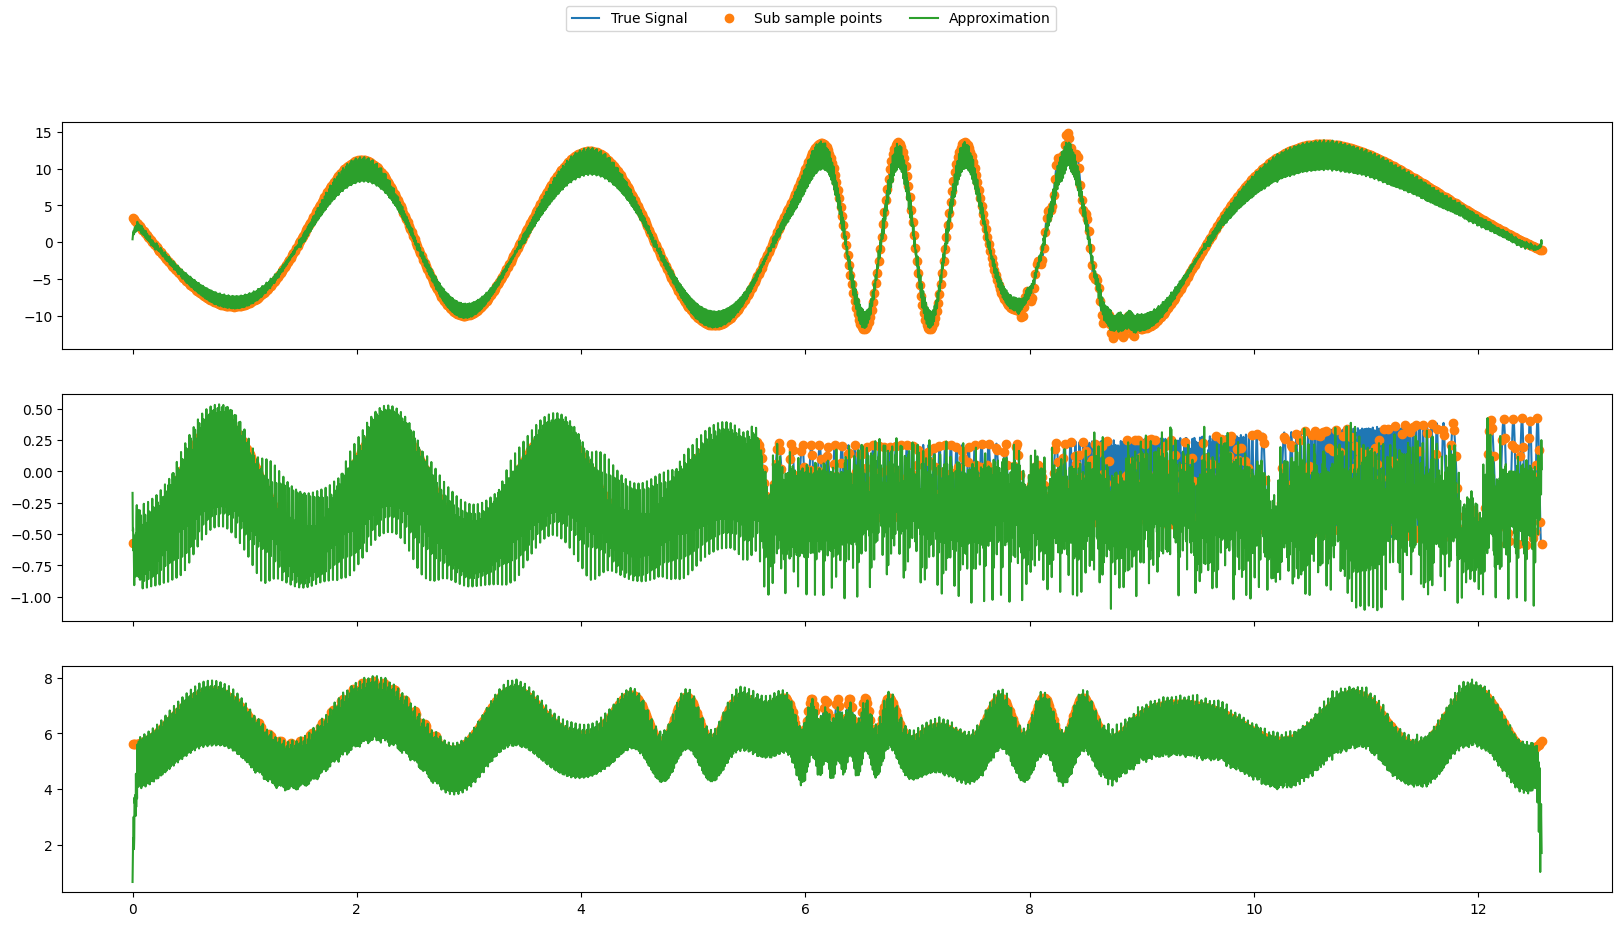

In [25]:
plot_signals(
    x_low,
    test_low_res_signals,
    x_high,
    test_high_res_signals,
    model_signals,
    sharey=False,
    rows=3,
    cols=1,
)